In [ ]:
pip install kagglehub

In [ ]:
python.exe -m pip install --upgrade pip

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/global-housing-market-analysis-2015-2024")

print("Path to dataset files:", path)

In [4]:
# Импорт всех необходимых библиотек
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Установка пути к данным Kaggle
kaggle_path = r'C:\Users\ICL1407\.cache\kagglehub\datasets\atharvasoundankar\global-housing-market-analysis-2015-2024\versions\1'

# Поиск CSV файла в указанной директории
csv_files = [f for f in os.listdir(kaggle_path) if f.endswith('.csv')]
if not csv_files:
    raise FileNotFoundError("В указанной директории не найдено CSV файлов")

# Загрузка первого найденного CSV файла
data_path = os.path.join(kaggle_path, csv_files[0])
df = pd.read_csv(data_path)

# Показать первые 5 строк данных
df.head()


,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980515
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399


In [ ]:
# Загрузка данных
data_path = r'C:\Users\ICL1407\.cache\kagglehub\datasets\atharvasoundankar\global-housing-market-analysis-2015-2024\versions\1\Global Housing Market.csv'
df = pd.read_csv(data_path)

# Предварительный анализ
print("Первые 5 строк данных:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nПропущенные значения:")
print(df.isnull().sum())

In [6]:
# Предварительный анализ данных
print("Размер данных:", df.shape)
print("\nТипы данных:")
print(df.dtypes)
print("\nПропущенные значения:")
print(df.isnull().sum())

Размер данных: (200, 11)

Типы данных:
Country                   object
Year                       int64
House Price Index        float64
Rent Index               float64
Affordability Ratio      float64
Mortgage Rate (%)        float64
Inflation Rate (%)       float64
GDP Growth (%)           float64
Population Growth (%)    float64
Urbanization Rate (%)    float64
Construction Index       float64
dtype: object

Пропущенные значения:
Country                  0
Year                     0
House Price Index        0
Rent Index               0
Affordability Ratio      0
Mortgage Rate (%)        0
Inflation Rate (%)       0
GDP Growth (%)           0
Population Growth (%)    0
Urbanization Rate (%)    0
Construction Index       0
dtype: int64


In [13]:
# Удаление ненужных столбцов
df = df.drop(['Unnamed: 0', 'Country_Code', 'Region'], axis=1, errors='ignore')

# Проверка наличия целевой переменной
if 'House Price Index' not in df.columns:
    print("Доступные столбцы:", df.columns.tolist())
    raise ValueError("Столбец 'House Price Index' не найден")

# Заполнение пропусков
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Разделение на признаки и целевую переменную
X = df.drop('House Price Index', axis=1)
y = df['House Price Index']

In [14]:
print("\nПризнаки (X):")
print(X.head())
print("\nЦелевая переменная (y):")
print(y.head())
print("\nКатегориальные признаки:", categorical_cols.tolist())
print("Числовые признаки:", numeric_cols.tolist())


Признаки (X):
  Country  Year  Rent Index  Affordability Ratio  Mortgage Rate (%)  \
0     USA  2015  116.550001             9.587945           4.493292   
1     USA  2016   51.440915            11.729189           5.662213   
2     USA  2017   70.386040             8.506676           2.197469   
3     USA  2018   91.469020             3.418054           4.537724   
4     USA  2019   56.837048             9.158097           3.700762   

   Inflation Rate (%)  GDP Growth (%)  Population Growth (%)  \
0            1.514121       -0.752044              -0.796707   
1            1.880204       -0.545400              -0.358084   
2            2.398940        0.930895               0.596245   
3            1.608407       -1.479587               2.321099   
4            1.293249        1.961415              -0.879640   

   Urbanization Rate (%)  Construction Index  
0              85.985284          118.089201  
1              69.127267          111.980515  
2              83.555279        

In [15]:
# Выделение типов признаков
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Создание преобразователя
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применение преобразований
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [16]:
# Дерево решений
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train_processed, y_train)
dt_pred = dt_model.predict(X_test_processed)

# Случайный лес
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)
rf_pred = rf_model.predict(X_test_processed)

# Оценка
print("Дерево решений:")
print(f"MSE: {mean_squared_error(y_test, dt_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, dt_pred):.2f}")
print(f"R2: {r2_score(y_test, dt_pred):.2f}")

print("\nСлучайный лес:")
print(f"MSE: {mean_squared_error(y_test, rf_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, rf_pred):.2f}")
print(f"R2: {r2_score(y_test, rf_pred):.2f}")

Дерево решений:
MSE: 1300.94
MAE: 31.18
R2: -0.41

Случайный лес:
MSE: 987.60
MAE: 26.64
R2: -0.07


C:\Users\ICL1407\AppData\Local\Temp\ipykernel_5616\3861279716.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


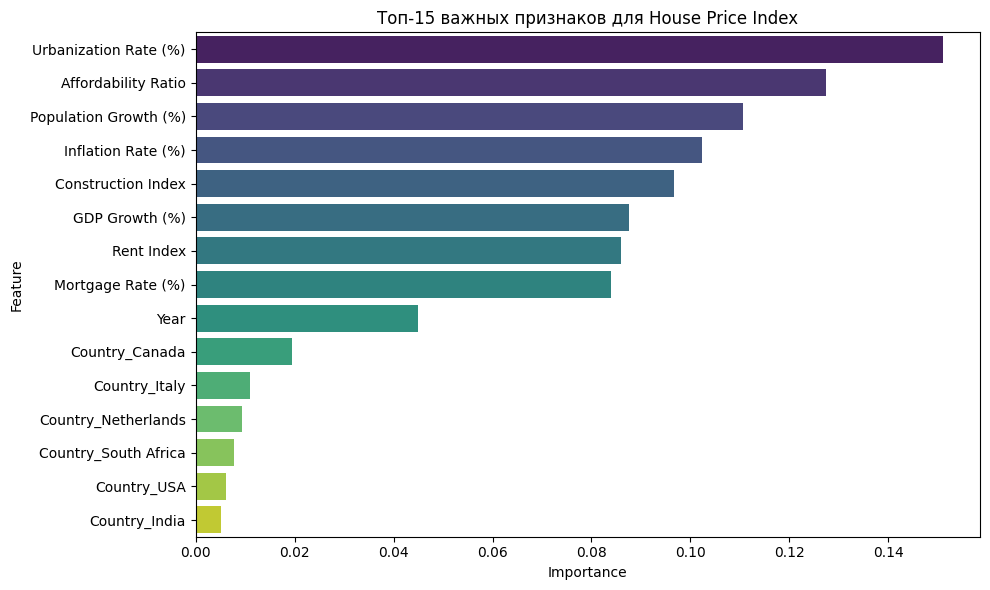

In [17]:
# Получение имен признаков после преобразований
feature_importances = rf_model.feature_importances_
feature_names = numeric_cols.tolist() + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Создание DataFrame с важностью
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False).head(15)

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Топ-15 важных признаков для House Price Index')
plt.tight_layout()
plt.show()

<Figure size 1200x400 with 0 Axes>

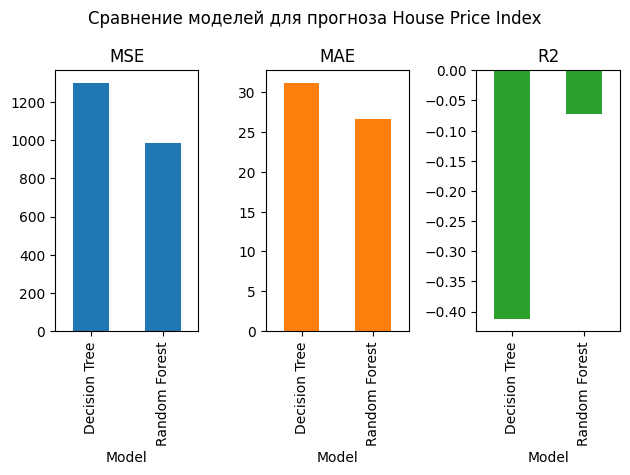

In [18]:
metrics = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'MSE': [mean_squared_error(y_test, dt_pred), mean_squared_error(y_test, rf_pred)],
    'MAE': [mean_absolute_error(y_test, dt_pred), mean_absolute_error(y_test, rf_pred)],
    'R2': [r2_score(y_test, dt_pred), r2_score(y_test, rf_pred)]
})

plt.figure(figsize=(12, 4))
metrics.set_index('Model').plot(kind='bar', subplots=True, layout=(1, 3), legend=False)
plt.suptitle('Сравнение моделей для прогноза House Price Index')
plt.tight_layout()
plt.show()

In [ ]:
получилось что что то сильно влияет на модель. Беда